## Imports

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
import pickle as pkl
from datetime import datetime
from dateutil import parser

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
plt.rcParams['figure.figsize'] = (12.0, 8.0)
plt.rcParams['axes.axisbelow'] = True

from plotly.offline import init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import plotly.io as pio
init_notebook_mode(True)

from hallprobecalib import hpc_ext_path
from hallprobecalib.hpcplots import scatter2d,scatter3d,histo

## Day 1: Cleaning, Plots

In [5]:
plotdir = hpc_ext_path+'plots/magnet_stability/2019-06-14/'

In [6]:
directory = hpc_ext_path+'datafiles/magnet_stability/nmr/'
filename = '2019-06-14 083830slow.txt'

In [7]:
df = pd.read_csv(directory+filename)

df.describe()

,Magnet Current [V],Magnet Voltage [V],Coil 1 (new),Coil 2 (old),LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke,Hall Element,...,LCW to magnet,NMR [T],NMR [FFT],Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z,
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,...,58.000000,5.800000e+01,58.0,58.0000,58.0,58.00,58.0,58.000,58.0,0.0
mean,8.472863,38.275121,56.774137,53.068279,24.520097,28.410456,28.249231,33.660715,27.405862,21.944828,...,24.632134,1.318750e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
std,0.000002,0.005310,0.062674,0.123407,0.036349,0.042456,0.047702,0.041947,0.007485,0.097087,...,0.046944,3.631875e-07,0.0,0.0000,0.0,0.00,0.0,0.000,0.0,NaN
min,8.472859,38.267017,56.645618,52.852314,24.463409,28.331963,28.124500,33.590073,27.383694,21.702560,...,24.553665,1.318749e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
25%,8.472861,38.270038,56.733664,52.971045,24.488874,28.378457,28.217034,33.627292,27.401475,21.884501,...,24.594581,1.318749e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
50%,8.472863,38.274200,56.762308,53.036816,24.513836,28.404043,28.246932,33.662571,27.406837,21.946192,...,24.624562,1.318750e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
75%,8.472864,38.280213,56.810590,53.147456,24.555267,28.451124,28.288050,33.696466,27.409642,22.021667,...,24.679160,1.318750e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
max,8.472868,38.283800,56.921295,53.326187,24.582119,28.488882,28.362909,33.726868,27.424511,22.135569,...,24.709110,1.318750e+00,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN


In [8]:
fig = histo(df[' NMR [T]'],bins=10,inline=True);

In [9]:
fname = 'hist_NMR'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/hist_NMR.html'

In [10]:
date = df.Time[[1]]

In [11]:
date.values[0]

'6/14/2019 8:40:07 AM'

In [12]:
def isdatetime(string):
    '''Helper function to handle exceptions in the list comprehension to find number of columns'''
    try:
        parser.parse(string)
        return True
    except:
        return False

In [13]:
isdatetime(date.values[0])

True

In [14]:
dates = [parser.parse(row.Time) for row in df.itertuples()]# if isdatetime(row.Time.values[0])]

In [15]:
dates

[datetime.datetime(2019, 6, 14, 8, 39, 7),
 datetime.datetime(2019, 6, 14, 8, 40, 7),
 datetime.datetime(2019, 6, 14, 8, 41, 7),
 datetime.datetime(2019, 6, 14, 8, 42, 8),
 datetime.datetime(2019, 6, 14, 8, 43, 7),
 datetime.datetime(2019, 6, 14, 8, 44, 7),
 datetime.datetime(2019, 6, 14, 8, 45, 8),
 datetime.datetime(2019, 6, 14, 8, 46, 7),
 datetime.datetime(2019, 6, 14, 8, 47, 7),
 datetime.datetime(2019, 6, 14, 8, 48, 8),
 datetime.datetime(2019, 6, 14, 8, 49, 7),
 datetime.datetime(2019, 6, 14, 8, 50, 7),
 datetime.datetime(2019, 6, 14, 8, 51, 7),
 datetime.datetime(2019, 6, 14, 8, 52, 8),
 datetime.datetime(2019, 6, 14, 8, 53, 7),
 datetime.datetime(2019, 6, 14, 8, 54, 7),
 datetime.datetime(2019, 6, 14, 8, 55, 8),
 datetime.datetime(2019, 6, 14, 8, 56, 7),
 datetime.datetime(2019, 6, 14, 8, 57, 7),
 datetime.datetime(2019, 6, 14, 8, 58, 7),
 datetime.datetime(2019, 6, 14, 8, 59, 8),
 datetime.datetime(2019, 6, 14, 9, 0, 7),
 datetime.datetime(2019, 6, 14, 9, 1, 7),
 datetime.dat

- NOTE: 'as.type("str")' is necessary to ensure plotly doesn't convert datetime to UTC!

In [16]:
df["Datetime"] = pd.to_datetime(dates).astype("str")
df = df.set_index("Datetime")

In [17]:
df

,Time,Magnet Current [V],Magnet Voltage [V],Coil 1 (new),Coil 2 (old),LCW in Coil1,LCW out Coil 1,LCW in Coil 2,LCW out Coil 2,Yoke,...,LCW to magnet,NMR [T],NMR [FFT],Zaber_Meas_MicroStep_X,Zaber_Meas_Encoder_X,Zaber_Meas_MicroStep_Y,Zaber_Meas_Encoder_Y,Zaber_Meas_MicroStep_Z,Zaber_Meas_Encoder_Z,
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-06-14 08:39:07,6/14/2019 8:39:07 AM,8.472860,38.283800,56.875408,53.127659,24.566053,28.482445,28.303379,33.717422,27.414020,...,24.707714,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:40:07,6/14/2019 8:40:07 AM,8.472859,38.283450,56.893219,53.148800,24.579601,28.488882,28.287159,33.699108,27.407270,...,24.709110,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:41:07,6/14/2019 8:41:07 AM,8.472861,38.283150,56.806793,52.988754,24.568176,28.483055,28.288261,33.718094,27.412939,...,24.701086,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:42:08,6/14/2019 8:42:08 AM,8.472859,38.282750,56.745125,53.101738,24.567528,28.473606,28.240879,33.726711,27.402449,...,24.687538,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:43:07,6/14/2019 8:43:07 AM,8.472860,38.282367,56.871735,53.023022,24.554707,28.456991,28.263516,33.714664,27.402981,...,24.688286,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:44:07,6/14/2019 8:44:07 AM,8.472861,38.282033,56.850136,53.093090,24.561531,28.454706,28.288183,33.710720,27.407782,...,24.691765,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:45:08,6/14/2019 8:45:08 AM,8.472862,38.281833,56.921295,53.235249,24.566958,28.452265,28.362909,33.699917,27.405893,...,24.690172,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:46:07,6/14/2019 8:46:07 AM,8.472862,38.281500,56.794342,53.032066,24.555355,28.454431,28.324659,33.663872,27.409750,...,24.691864,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN
2019-06-14 08:47:07,6/14/2019 8:47:07 AM,8.472859,38.281150,56.746018,52.964363,24.554983,28.459904,28.303497,33.693882,27.402252,...,24.686909,1.318750,0.0,210351.5625,538500.0,178906.25,458000.0,642578.125,1645000.0,NaN


In [18]:
d = df.index[[1]]
d[0]

'2019-06-14 08:40:07'

In [19]:
fig = scatter2d(df.index,df[" NMR [T]"],lines=False,markers=True,size_list=[6],inline=True)

In [20]:
nmr =df[' NMR [T]']
(nmr.max() - nmr.min()) / nmr.mean()

1.1253084171442793e-06

In [21]:
pio.write_image(fig, plotdir+'NMR_vs_Time.pdf')
pio.write_image(fig, plotdir+'NMR_vs_Time.png')
plot(fig, filename=plotdir+'NMR_vs_Time.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/NMR_vs_Time.html'

In [22]:
df.columns

Index(['Time', ' Magnet Current [V]', ' Magnet Voltage [V]', 'Coil 1 (new)',
       ' Coil 2 (old)', ' LCW in Coil1', ' LCW out Coil 1', ' LCW in Coil 2',
       ' LCW out Coil 2', ' Yoke', ' Hall Element', ' Floor', ' Roof',
       'Parameter HVAC return', ' Parameter HVAC sensor', ' CH13', ' CH14',
       ' CH15', ' CH16', ' CH17', ' CH18', ' CH19', ' CH20', 'CH21', ' CH22',
       ' CH23', ' CH24', ' CH25', ' CH26', ' PS internal', ' PS Vent1',
       ' PS Vent2', ' TrippLite HVAC supply', ' Tripplite HVAC exhaust',
       'LCW to PS', ' LCW in barrel', ' ICW in', ' ICW HE1 out',
       ' ICW He2 out', ' LCW return magnet', ' LCW to barrel', ' LCW from PS',
       'LCW to magnet', ' NMR [T]', ' NMR [FFT]', ' Zaber_Meas_MicroStep_X',
       ' Zaber_Meas_Encoder_X', '  Zaber_Meas_MicroStep_Y',
       ' Zaber_Meas_Encoder_Y', '  Zaber_Meas_MicroStep_Z',
       ' Zaber_Meas_Encoder_Z', ' '],
      dtype='object')

In [23]:
temps_ch = [a for a in df.columns if ("CH" in a) and int(a[-2:])<21]# or "HVAC" in a]
temps_ch.append(" Hall Element")
temps_ch.append(" Floor")
temps_ch.append(" Roof")

In [24]:
temps_ch

[' CH13',
 ' CH14',
 ' CH15',
 ' CH16',
 ' CH17',
 ' CH18',
 ' CH19',
 ' CH20',
 ' Hall Element',
 ' Floor',
 ' Roof']

In [25]:
df[temps_ch].describe()

,CH13,CH14,CH15,CH16,CH17,CH18,CH19,CH20,Hall Element,Floor,Roof
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,19.383837,20.257945,20.497557,19.922874,18.454628,18.671275,18.301136,17.918865,21.944828,21.366286,17.290858
std,0.051126,0.019700,0.020284,0.022050,0.033169,0.032039,0.038616,0.027874,0.097087,0.008649,0.020763
min,19.277128,20.221384,20.449492,19.865282,18.364876,18.583317,18.197496,17.846964,21.702560,21.348265,17.237757
25%,19.350591,20.245496,20.485388,19.907495,18.432865,18.655080,18.282406,17.904533,21.884501,21.362449,17.277844
50%,19.382813,20.260878,20.495577,19.927716,18.458411,18.678400,18.310389,17.921577,21.946192,21.366771,17.291529
75%,19.426631,20.271360,20.514298,19.936027,18.479154,18.694653,18.327774,17.937499,22.021667,21.371445,17.302438
max,19.484871,20.297936,20.533569,19.965939,18.504370,18.715952,18.354021,17.968325,22.135569,21.383291,17.333509


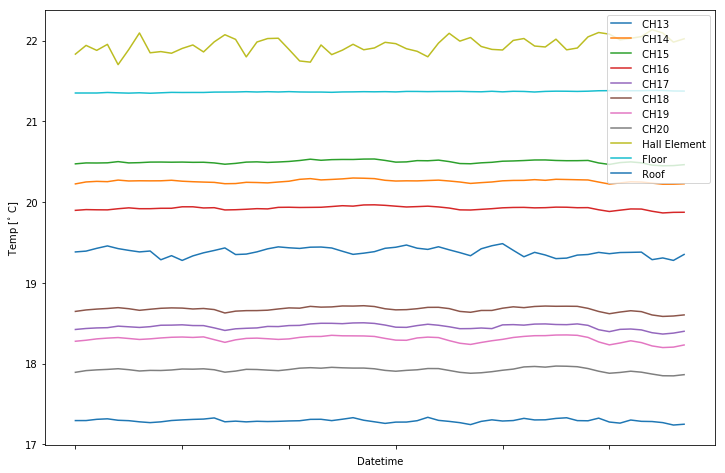

In [26]:
fig = plt.figure()
for c in temps_ch:
    df[c].plot()
#plt.ylabel('Temp [C]')
plt.ylabel("Temp [$^{\circ}$ C]")
plt.legend()    

In [27]:
fig = scatter2d([df.index for c in temps_ch],[df[c] for c in temps_ch],inline=True);
fig.layout.title = "Temp vs. Datetime"
fig.layout.yaxis.title = "Temp [deg. C]"

In [28]:
fname = 'temps_scatter'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/temps_scatter.html'

In [29]:
fig = histo([df[c] for c in temps_ch],verbosity=1,inline=True);
fig.layout.title = "Temp Histos"

In [30]:
fname = 'hist_temps'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/hist_temps.html'

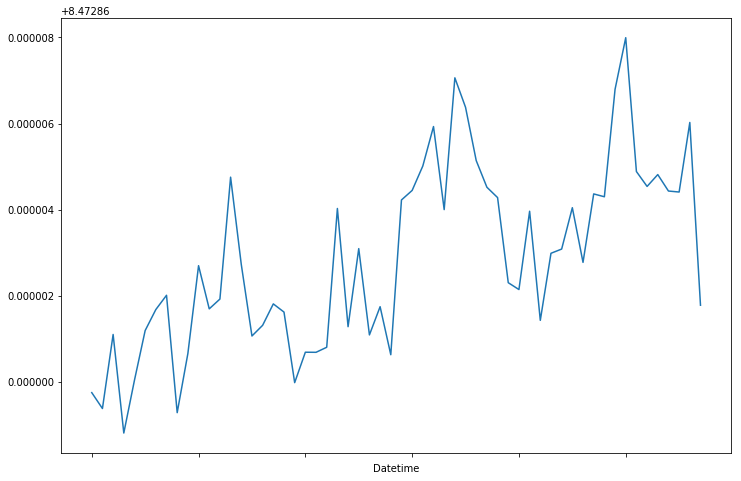

In [31]:
df[' Magnet Current [V]'].plot()

In [32]:
fig = scatter2d(df.index,df[' Magnet Current [V]'],inline=True);

In [33]:
fname = 'magnet_current'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/magnet_current.html'

In [34]:
8e-6 /8.47286

9.441912176053893e-07

In [35]:
fig = scatter2d(df.index,df[' Magnet Voltage [V]'],inline=True);

In [36]:
fname = 'magnet_voltage'
pio.write_image(fig, plotdir+fname+'.pdf')
pio.write_image(fig, plotdir+fname+'.png')
plot(fig, filename=plotdir+fname+'.html')

'file:///home/ckampa/Coding/hallprobecalib_extras/plots/magnet_stability/2019-06-14/magnet_voltage.html'

In [37]:
m =df[' Magnet Voltage [V]']
(m.max() - m.min()) / m.mean()

0.000438491961504023

In [38]:
1.5e-2 /38.275

0.00039190071848465056

In [39]:
fig = scatter2d(2*[df.index],[df[" NMR [T]"],df[" NMR [T]"]*df[' Magnet Voltage [V]']/df[' Magnet Voltage [V]'].mean()],lines=False,markers=True,size_list=[6,6],inline=True)

In [40]:
fig = scatter2d(2*[df.index],[df[" NMR [T]"],df[" NMR [T]"]*df[' Magnet Current [V]']/df[' Magnet Current [V]'].mean()],lines=False,markers=True,size_list=[6,6],inline=True)
#fig = scatter2d(2*[df.index],[df[" NMR [T]"],df[" NMR [T]"]*df[' Magnet Current [V]'].mean()/df[' Magnet Current [V]']],lines=False,markers=True,size_list=[6,6],inline=True)

In [41]:
a = df[" NMR [T]"]*df[' Magnet Current [V]']/df[' Magnet Current [V]'].mean()
a.name = "NMR"
histo([a],bins=10,inline=True);

In [42]:
fig = scatter2d(df.index,df[" NMR [T]"],lines=False,markers=True,size_list=[6],inline=True);

In [43]:
df[" NMR [T]"]*df[' Magnet Current [V]'].mean()/df[' Magnet Current [V]']

Datetime
2019-06-14 08:39:07    1.318751
2019-06-14 08:40:07    1.318751
2019-06-14 08:41:07    1.318751
2019-06-14 08:42:08    1.318751
2019-06-14 08:43:07    1.318751
2019-06-14 08:44:07    1.318750
2019-06-14 08:45:08    1.318750
2019-06-14 08:46:07    1.318750
2019-06-14 08:47:07    1.318751
2019-06-14 08:48:08    1.318750
2019-06-14 08:49:07    1.318750
2019-06-14 08:50:07    1.318750
2019-06-14 08:51:07    1.318750
2019-06-14 08:52:08    1.318750
2019-06-14 08:53:07    1.318750
2019-06-14 08:54:07    1.318750
2019-06-14 08:55:08    1.318750
2019-06-14 08:56:07    1.318750
2019-06-14 08:57:07    1.318750
2019-06-14 08:58:07    1.318750
2019-06-14 08:59:08    1.318750
2019-06-14 09:00:07    1.318750
2019-06-14 09:01:07    1.318750
2019-06-14 09:02:07    1.318750
2019-06-14 09:03:07    1.318750
2019-06-14 09:04:08    1.318749
2019-06-14 09:05:07    1.318750
2019-06-14 09:06:08    1.318750
2019-06-14 09:07:07    1.318750
2019-06-14 09:08:07    1.318749
2019-06-14 09:09:07    1.318749

In [205]:
for col in df.columns:
    fig = scatter2d(df.index,df[col],lines=True,markers=False,size_list=[6],inline=True); 